# Classifier for Hand-written Digits

In [1]:
# imports
import sys
import numpy as np
import matplotlib.pyplot as plt
import random
sys.path.append('..\..') # hack to make cnn project imports work
from Network import Network 
from Main import TestNetwork, TrainNetwork
from HyperParameters import HyperParameters

# Prepare Data
Loads data from Mnist files into three datasets. Displays some example data.

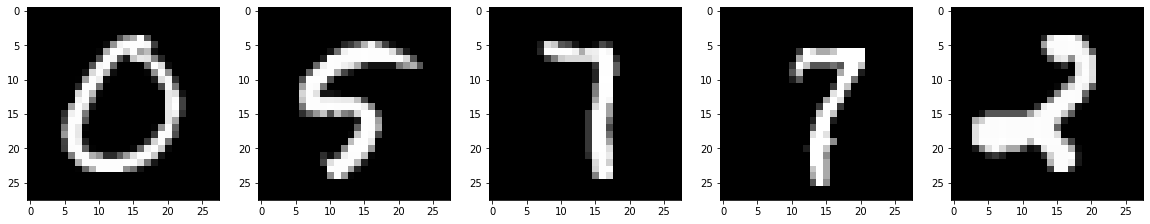

In [2]:
from Mnist import Mnist
ds_tr, ds_va, ds_te = Mnist.Load('data') # load training, validation and testing datasets

# plot some random examples from the training set
num_plots = 5
egs = random.choices(ds_tr.data, k=num_plots)
fig, axs = plt.subplots(ncols=5, figsize=(20,num_plots))
for i in range(num_plots): axs[i].imshow(Mnist.Expand(egs[i]), cmap='gray') # draw randomly expanded examples

# Create/Load Network

In [3]:
# create new network from json
net_str = ('{ "network": [ '
    '{ "layer": "input", "shape": [ 28,28,1 ] }, '
    '{ "layer": "full_con", "size": 200, "act_func": "leaky_relu" }, '
    '{ "layer": "full_con", "size": 50, "act_func": "leaky_relu" }, '
    '{ "layer": "softmax_output", "size": 10 } '
    '] }')
net = Network(json_str=net_str)
net.Print() # print network model

input: shape=(28, 28, 1)
full_con: size=200, act_func=leaky_relu (params=157,000)
full_con: size=50, act_func=leaky_relu (params=10,050)
softmax_output: size=10, (params=510)
(total params=167,560)


In [4]:
net = Network(json_fn='nn_in.json') # load network from file
net.Print() # print network model

input: shape=(28, 28, 1)
conv: shape=(24, 24, 8), f_shape=(5, 5), act_func=leaky_relu (params=208)
full_con: size=100, act_func=leaky_relu (params=460,900)
softmax_output: size=10, (params=1,010)
(total params=462,118)


# Test Network Against Datasets

In [5]:
n_correct = TestNetwork(net, ds_tr) # test using training data
print('Training data: {:.2%}'.format(n_correct/ds_tr.num)) # display results
n_correct = TestNetwork(net, ds_te) # test using test data
print('Test data: {:.2%}'.format(n_correct/ds_te.num)) # display results

Training data: 97.93%
Test data: 98.06%


# Train/Save Network

In [6]:
# train network
params = HyperParameters(eta=0.05, L2=0.0001, mu=0.25, batch_size=128, expand_data=True) 
TrainNetwork(net, ds_tr, params, num_epochs=2)

Epoch 1: 98.12% (4m:22s)
Epoch 2: 98.17% (4m:18s)
Training over 2 epoch(s) complete (8m:40s).


In [ ]:
# save network to output file
net.Save('nn_out.json') 